In [1]:
#Importing required libraries

import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
import math
np.random.seed(445)

In [2]:
dataframe=read_csv("Asteroid_Updated.csv", encoding="utf8")
dataframe

C:\Users\kebab\AppData\Local\Temp\ipykernel_9624\3001672724.py:1: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe=read_csv("Asteroid_Updated.csv", encoding="utf8")


,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.594780,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.233240,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.034540,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.139480,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.095890,MBA,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839709,NaN,2.812945,0.664688,4.695700,183.310012,234.618352,0.943214,4.682676,4.717914,17298.0,...,NaN,NaN,NaN,NaN,NaN,0.032397,APO,0.208911,1723.217927,156.905910
839710,NaN,2.645238,0.259376,12.574937,1.620020,339.568072,1.959126,3.331350,4.302346,16.0,...,NaN,NaN,NaN,NaN,NaN,0.956145,MBA,0.229090,1571.431965,13.366251
839711,NaN,2.373137,0.202053,0.732484,176.499082,198.026527,1.893638,2.852636,3.655884,5.0,...,NaN,NaN,NaN,NaN,NaN,0.893896,MBA,0.269600,1335.311579,355.351127
839712,NaN,2.260404,0.258348,9.661947,204.512448,148.496988,1.676433,2.844376,3.398501,10.0,...,NaN,NaN,NaN,NaN,NaN,0.680220,MBA,0.290018,1241.302609,15.320134


In [3]:
#First, we need to do a regression and find out what all the columns represent.

# a – Semi-major axis is the radius of the longest diameter.

# e – Orbital eccentricity represents the deviation of the orbital path from a perfect circle. It can have a value from 0 to 1, where 0 corresponds to a perfect circle.

# i – Inclination with respect to the x–y ecliptic plane represents the tilt of the body in relation to the body it orbits.

# om – Longitude of ascending node represents the angle between the reference path (the path of the body around which the asteroid orbits) to the ascending node.

# w – Argument of perihelion. Perihelion is the point on the orbit where the distance between the asteroid and the orbiting body is the smallest. The argument of perihelion represents the angle between the reference plane and the perihelion.

# q – Perihelion distance. The minimum distance at the perihelion point.

# ad – Aphelion distance (au). Aphelion is opposite to perihelion, i.e., the point where the distance between the asteroid and the orbiting body is maximal.

# per_y – Orbital period. The time it takes for the asteroid to complete one orbit around the body.

# H – Absolute Magnitude parameter. Represents the size of the body when observed from a distance of 32.6 light-years.

# neo – Near Earth object. Indicates whether the body is near Earth or not.

# pha – Physically hazardous asteroid.

# moid – Earth Minimum Orbit Intersection Distance. Represents the minimum distance between two orbits, in this case, the Earth's orbit and the asteroid's orbit.

# n – Mean motion (deg/d). Rotational speed of the body.

# per – Orbital period (d). The time it takes for the body to complete one rotation.

# ma – Mean anomaly (deg) [Reference: https://en.wikipedia.org/wiki/Mean_anomaly]

# abledo – How much light is reflected from a body.



# Our task is to create a model that predicts pha (Physically Hazardous Asteroid) based on other data.


<class 'pandas.core.frame.DataFrame'>
Index: 802207 entries, 0 to 839713
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   n       802207 non-null  float64
 1   per     802207 non-null  float64
 2   per_y   802207 non-null  float64
dtypes: float64(3)
memory usage: 24.5 MB


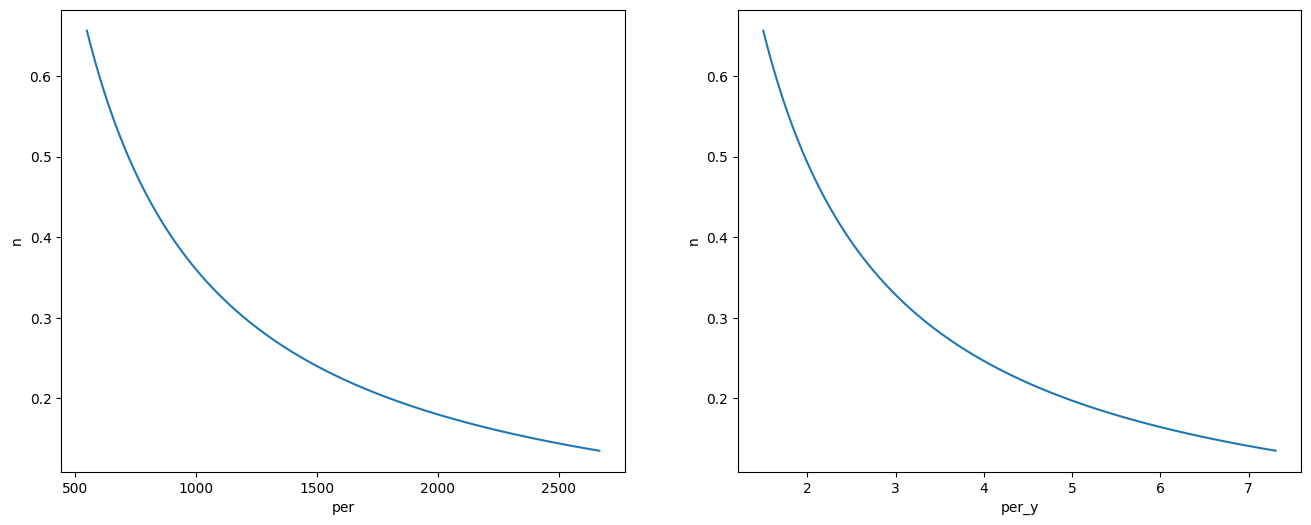

In [4]:
#We begin the work by deleting unnecessary columns.

#https://en.wikipedia.org/wiki/Mean_motion

# n - Mean motion: The speed at which the body orbits or revolves around another body.
# per, per_y - Orbital period: The time it takes for the body to complete one orbit around the orbiting body.


#By researching the terms in the dataset, we conclude that there is a correlation between the variables n, per, and per_y. 
#The same can be observed in the graph generated by the following code.



dataframe2=(dataframe[["n","per","per_y","pha"]]).dropna()
dataframe2=dataframe2.drop("pha",axis=1)

dataframe2 = dataframe2.astype(float)

fig, axes = plt.subplots(figsize=(16, 6),ncols=2)

x = np.quantile(dataframe2['per'], [0,0.25,0.5,0.75,1])
maxY=x[3]+1.5*(x[3]-x[1])
minY=x[1]-1.5*(x[3]-x[1])
dataframe2=dataframe2[dataframe2["per"]>minY]
dataframe2=dataframe2[dataframe2["per"]<maxY]

x = np.quantile(dataframe2['per_y'], [0,0.25,0.5,0.75,1])
maxY=x[3]+1.5*(x[3]-x[1])
minY=x[1]-1.5*(x[3]-x[1])
dataframe2=dataframe2[dataframe2["per_y"]>minY]
dataframe2=dataframe2[dataframe2["per_y"]<maxY]

dataframe2.info()

sns.lineplot(data=dataframe2, x="per", y="n",ax=axes[0])
sns.lineplot(data=dataframe2, x="per_y", y="n",ax=axes[1])

# For the meteor's danger assessment, the speed at which the meteor is moving is crucial.
# Since the speed is correlated with per_y and per, we decide to drop these columns.

dataframe=dataframe.drop("per",axis=1)
dataframe=dataframe.drop("per_y",axis=1)

In [5]:
#We are removing columns that cannot influence the final outcome (codes, colors, names).

dataframe=dataframe.drop("data_arc",axis=1)
dataframe=dataframe.drop("condition_code",axis=1)
dataframe=dataframe.drop("n_obs_used",axis=1)
dataframe=dataframe.drop("extent",axis=1)
dataframe=dataframe.drop("rot_per",axis=1)
dataframe=dataframe.drop("GM",axis=1)
dataframe=dataframe.drop("BV",axis=1)
dataframe=dataframe.drop("UB",axis=1)
dataframe=dataframe.drop("IR",axis=1)
dataframe=dataframe.drop("spec_B",axis=1)
dataframe=dataframe.drop("spec_T",axis=1)
dataframe=dataframe.drop("G",axis=1)
dataframe=dataframe.drop("class",axis=1)
dataframe=dataframe.drop("name",axis=1)

In [6]:
#Now we are removing NA values
#We are printing all NA values with the following command:
dataframe.isnull().sum()

a                2
e                0
i                0
om               0
w                0
q                0
ad               6
H             2689
neo              6
pha          16442
diameter    702078
albedo      703305
moid         16442
n                2
ma               8
dtype: int64

<Axes: xlabel='albedo', ylabel='H'>

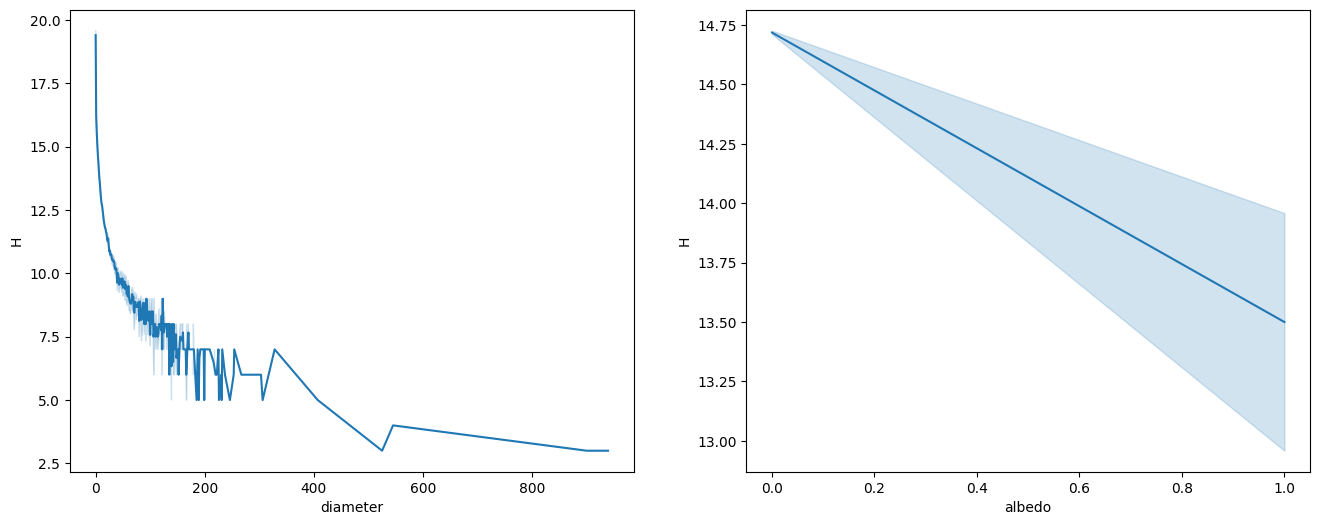

In [7]:
#Biggest problems are columns diameter and albedo which have more that 90% NA values.
#We could remove them but lets first do a research and see if they can be used for finding other NA values.


#After doing some research, we have found the following information:
#https://en.wikipedia.org/wiki/Absolute_magnitude 
#https://cneos.jpl.nasa.gov/tools/ast_size_est.html
#https://cneos.jpl.nasa.gov/about/neo_groups.html

#These sites suggest that there is correlation between the columns:

# H – Absolute Magnitude parameter. Represents the size of the body as if the body were observed from a distance of 32.6 light years.
# diameter - the diameter of the body.
# albedo: How much light is reflected from a body.

#Let's make a graph to test these assumptions.

dataframe2=dataframe.dropna()
dataframe2=dataframe2.drop("pha",axis=1)
dataframe2=dataframe2.drop("neo",axis=1)
dataframe2 = dataframe2.astype(float)
dataframe2 = dataframe2.astype(int)

fig, axes = plt.subplots(figsize=(16, 6),ncols=2)


sns.lineplot(data=dataframe2, x="diameter", y="H",ax=axes[0])
sns.lineplot(data=dataframe2, x="albedo", y="H",ax=axes[1])

In [8]:

#Based on the graph above, we determine that there is a dependency between
#diameter, H (Absolute magnitude parameter), and albedo. 
#This would allow us to fill in the missing values in the diameter column. 
#However, this is not possible because all columns with missing values for diameter also have missing values for albedo. 
#Therefore, we are forced to delete the diameter and albedo columns. 
#We will use H because it has the greatest impact on the asteroid's diameter, as can be seen from the table and the formula at https://cneos.jpl.nasa.gov/tools/ast_size_est.html."

In [9]:
#Filling in the NA values in the H column using a formula.

def transformisi(x):
    if(pandas.isna(x["H"])):
        if not (pandas.isna(x["diameter"])):
            if not (pandas.isna(x["albedo"])):
                x.loc["H"]=-((-3.1236*math.log(10)+(math.log((x.loc["diameter"]**2)*x.loc["albedo"])/2))/(0.2*math.log(10)))
                   
        
    return x
dataframe=dataframe.transform(lambda x:transformisi(x),axis=1)
len(dataframe[pandas.isna(dataframe["H"])])

#We delete and drop the remaining values of H that we cannot calculate and also drop the diameter and albedo columns.

dataframe=dataframe.drop("diameter",axis=1)
dataframe=dataframe.drop("albedo",axis=1)


In [10]:
#For PHA (Potentially Hazardous Asteroids), we cannot fill in the missing values, so we delete them.
dataframe=dataframe.dropna(subset=['pha'])

In [11]:
dataframe.isnull().sum()

a          2
e          0
i          0
om         0
w          0
q          0
ad         6
H       2415
neo        6
pha        0
moid       0
n          2
ma         8
dtype: int64

In [12]:
#Since there are a few remaining NA values, we will drop them.
dataframe=dataframe.dropna()
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 820845 entries, 0 to 839713
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   a       820845 non-null  object
 1   e       820845 non-null  object
 2   i       820845 non-null  object
 3   om      820845 non-null  object
 4   w       820845 non-null  object
 5   q       820845 non-null  object
 6   ad      820845 non-null  object
 7   H       820845 non-null  object
 8   neo     820845 non-null  object
 9   pha     820845 non-null  object
 10  moid    820845 non-null  object
 11  n       820845 non-null  object
 12  ma      820845 non-null  object
dtypes: object(13)
memory usage: 87.7+ MB


In [13]:
#We notice that all variables are stored as strings, and therefore, we need to transform them before we proceed with the work.
#Transformation from string to numeric variables

dataframe[dataframe.columns[0:8]] = dataframe[dataframe.columns[0:8]].astype(float)
dataframe[dataframe.columns[10:14]] = dataframe[dataframe.columns[10:14]].astype(float)

#Transformation from string to categorical variables
dataframe["pha"] = dataframe["pha"].astype("category")
dataframe["neo"] = dataframe["neo"].astype("category")

dataframe.info()


<class 'pandas.core.frame.DataFrame'>
Index: 820845 entries, 0 to 839713
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   a       820845 non-null  float64 
 1   e       820845 non-null  float64 
 2   i       820845 non-null  float64 
 3   om      820845 non-null  float64 
 4   w       820845 non-null  float64 
 5   q       820845 non-null  float64 
 6   ad      820845 non-null  float64 
 7   H       820845 non-null  float64 
 8   neo     820845 non-null  category
 9   pha     820845 non-null  category
 10  moid    820845 non-null  float64 
 11  n       820845 non-null  float64 
 12  ma      820845 non-null  float64 
dtypes: category(2), float64(11)
memory usage: 76.7 MB


pha
N    818830
Y      2015
dtype: int64


<Axes: xlabel='pha', ylabel='count'>

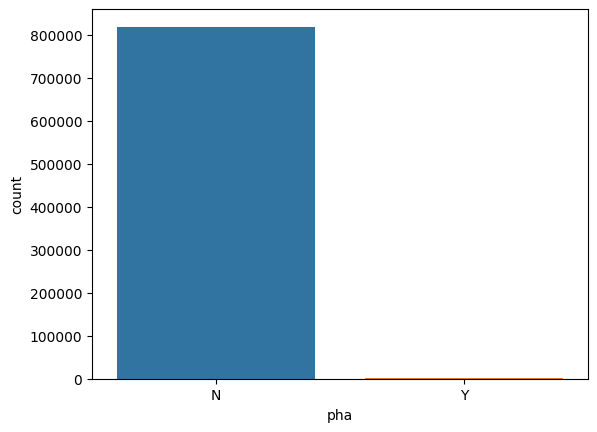

In [14]:
#https://scikit-learn.org/stable/modules/outlier_detection.html
#Since the ratio of positive to negative values for 'pha' is very large, we must exercise caution when removing outliers for positive values, as it can negatively impact the model.
#We will address this issue using the imbalanced-learn library, which we will utilize when splitting the data into training and test sets.

print(dataframe.groupby(['pha']).size())
sns.countplot(x='pha', data=dataframe)

<Axes: xlabel='pha', ylabel='a'>

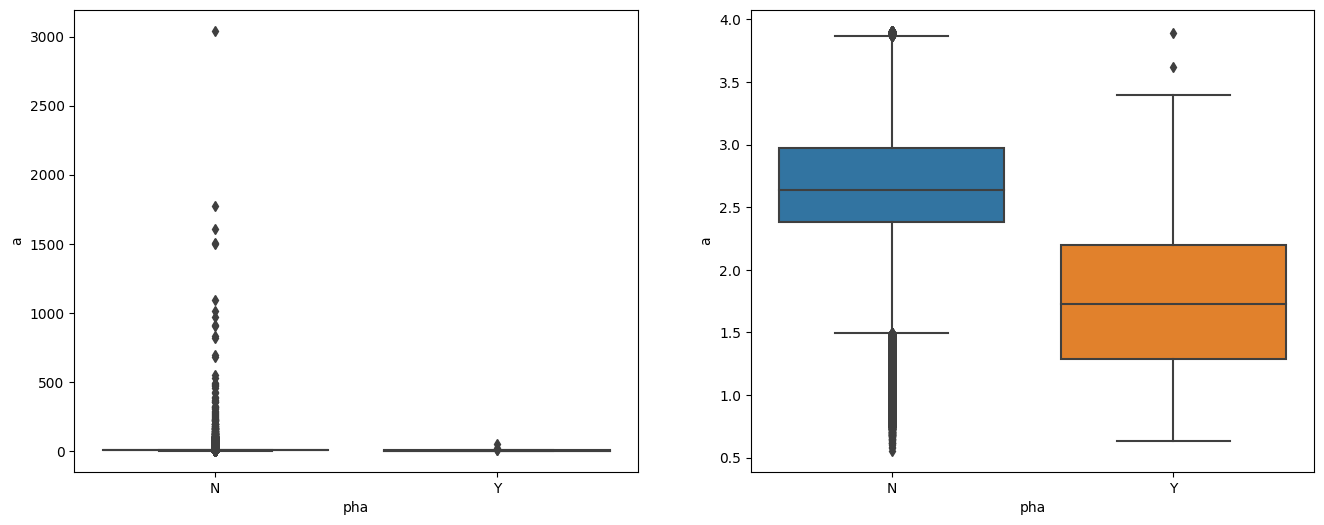

In [15]:
#The semi-major axis (a) is the radius of the longest diameter.

fig, axes = plt.subplots(figsize=(16, 6),ncols=2)

dataframe2=dataframe.copy()
sns.boxplot(data=dataframe2,x=dataframe2['pha'],y=dataframe2['a'],ax=axes[0])



x = np.quantile(dataframe2.loc[(dataframe2["pha"]=="N")]["a"], [0,0.25,0.5,0.75,1])
maxY=x[3]+1.5*(x[3]-x[1])

minY=x[1]-1.5*(x[3]-x[1])

#The Astronomical Unit (AU) represents the distance from the Earth to the Sun. 
# This suggests that values greater than 3.91 are outliers, but we cannot confirm this without the assistance of an expert. 
# The total number of outliers is 15127, which we will delete for now, although this decision is not final

dataframe2=dataframe2[dataframe2["a"]<3.91]

sns.boxplot(data=dataframe2,x=dataframe2['pha'],y=dataframe2['a'],ax=axes[1])

#After removing the outliers from the graphs, we observe that 'a' is a potential candidate for one of the predictors.

#After further testing, we determine that 'a' is not the best predictor, so we decide not to delete the given outliers.


16752


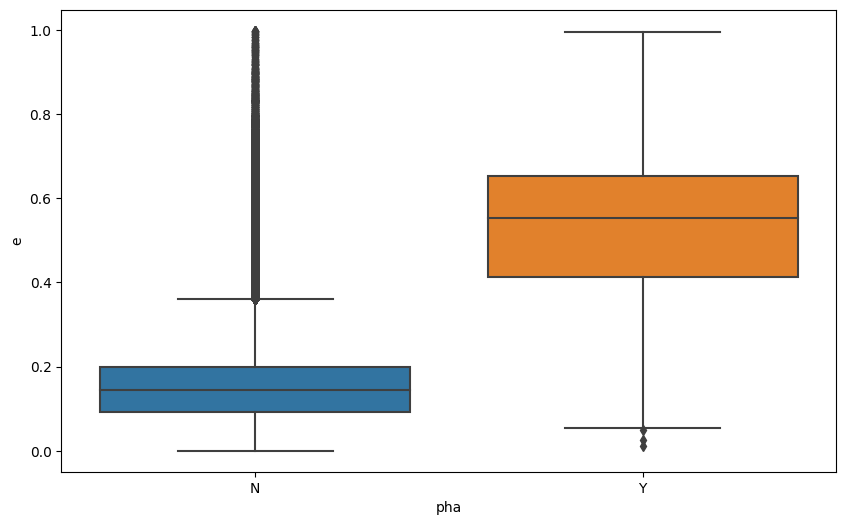

In [16]:
#The orbital eccentricity (e) represents the deviation of the orbital path from a perfect circle. It can have a value from 0 to 1, with 0 indicating a perfect circle.

fig, axes = plt.subplots(figsize=(10, 6))
dataframe2=dataframe.copy()
sns.boxplot(data=dataframe2,x=dataframe2['pha'],y=dataframe2['e'],ax=axes)

#All values are within the range (0,1), which is good. 
#From the graphs, it can be concluded that 'e' is correlated with 'pha,' meaning it influences the asteroid's hazard level. 
#This observation is further confirmed in subsequent testing.

print(len(dataframe2.loc[(dataframe2["e"]>0.4) & (dataframe2["pha"]=="N")]))

<Axes: xlabel='pha', ylabel='i'>

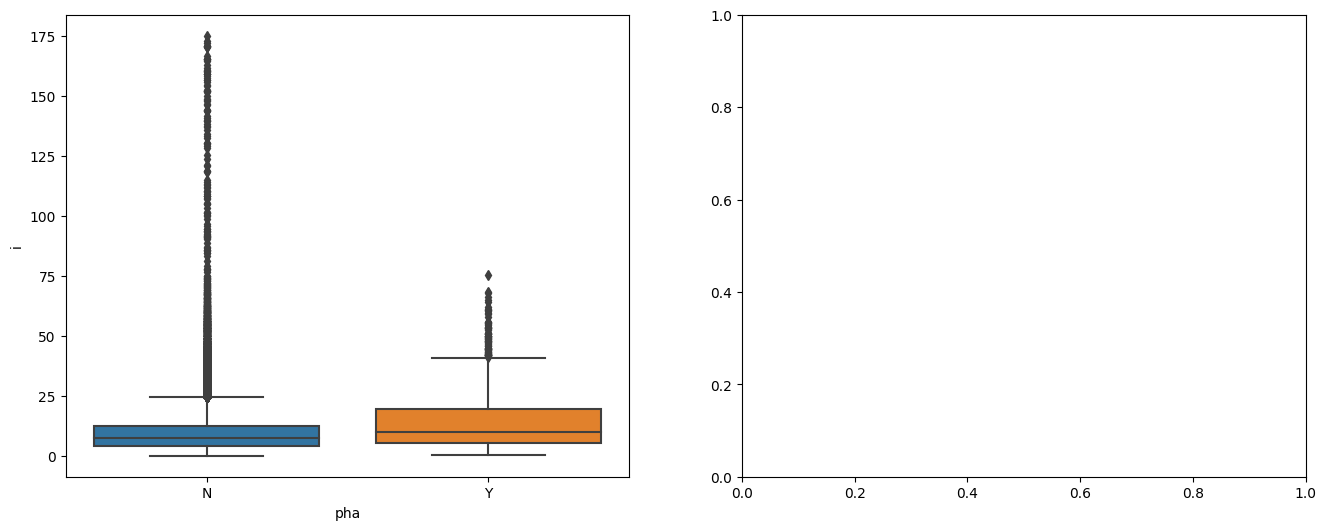

In [17]:
#Inclination with respect to the x-y ecliptic plane (i) represents the tilt of the body in relation to the body it orbits.
fig, axes = plt.subplots(figsize=(16, 6),ncols=2)

sns.boxplot(data=dataframe2,x=dataframe2['pha'],y=dataframe2['i'],ax=axes[0])

#"From the graphs, it is observed that 'i' is not correlated with 'pha,' meaning it is not the best predictor."

<Axes: xlabel='pha', ylabel='om'>

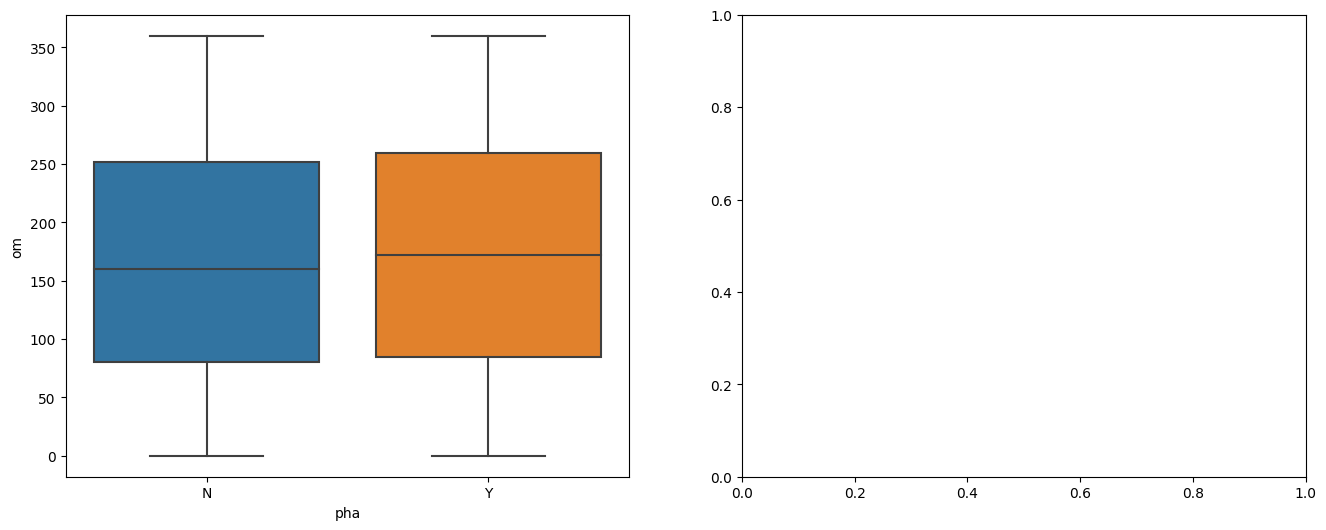

In [18]:
#The longitude of ascending node (om) represents the angle between the reference trajectory (the path of the body around which the asteroid orbits) to the ascending node.

dataframe2=dataframe.copy()
fig, axes = plt.subplots(figsize=(16, 6),ncols=2)

sns.boxplot(data=dataframe2,x=dataframe2['pha'],y=dataframe2['om'],ax=axes[0])


#From the graphs, we notice that 'om' (Longitude of ascending node) is not a good predictor because the graphs are in a plane, leading us to the conclusion that there is no dependence between 'pha' (potentially hazardous asteroid) and 'om'.

<Axes: xlabel='pha', ylabel='w'>

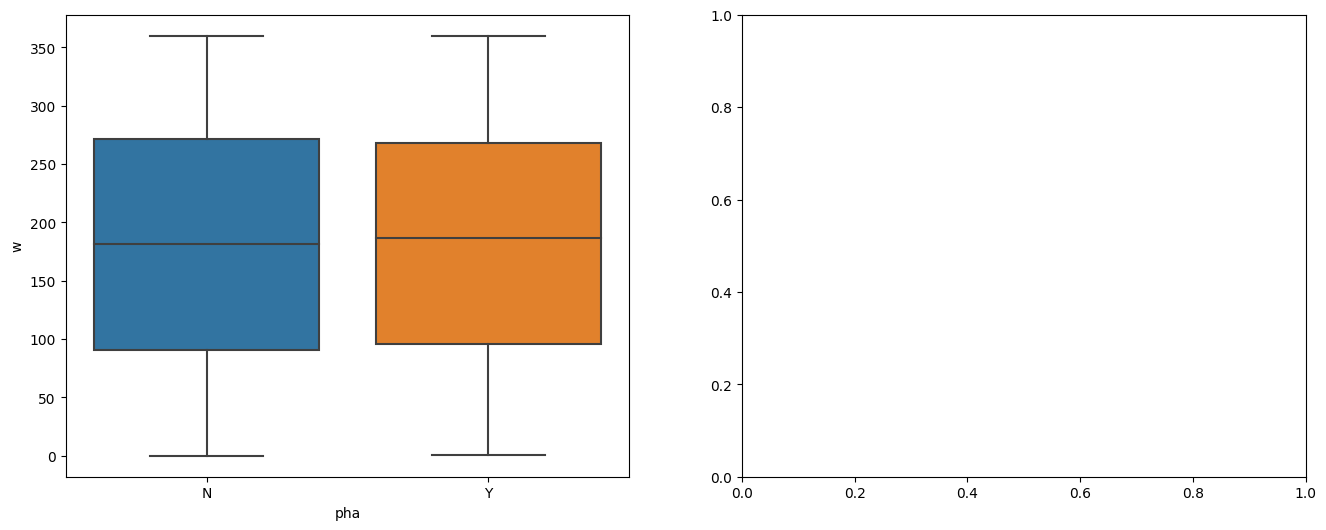

In [19]:
#The argument of perihelion (𝜔) represents the angle between the reference plane and the perihelion.
#Perihelion is the point on the orbit where the distance between the asteroid and the body it orbits is the smallest.

dataframe2=dataframe.copy()

fig, axes = plt.subplots(figsize=(16, 6),ncols=2)

sns.boxplot(data=dataframe2,x=dataframe2['pha'],y=dataframe2['w'],ax=axes[0])

#From the graphs, we observe that 'W' (Argument of perihelion) is not a good predictor
#because the graphs are in a plane, leading us to the conclusion that there is no dependence between 'pha' (potentially hazardous asteroid) and 'W'.

[(0.0, 10.0)]

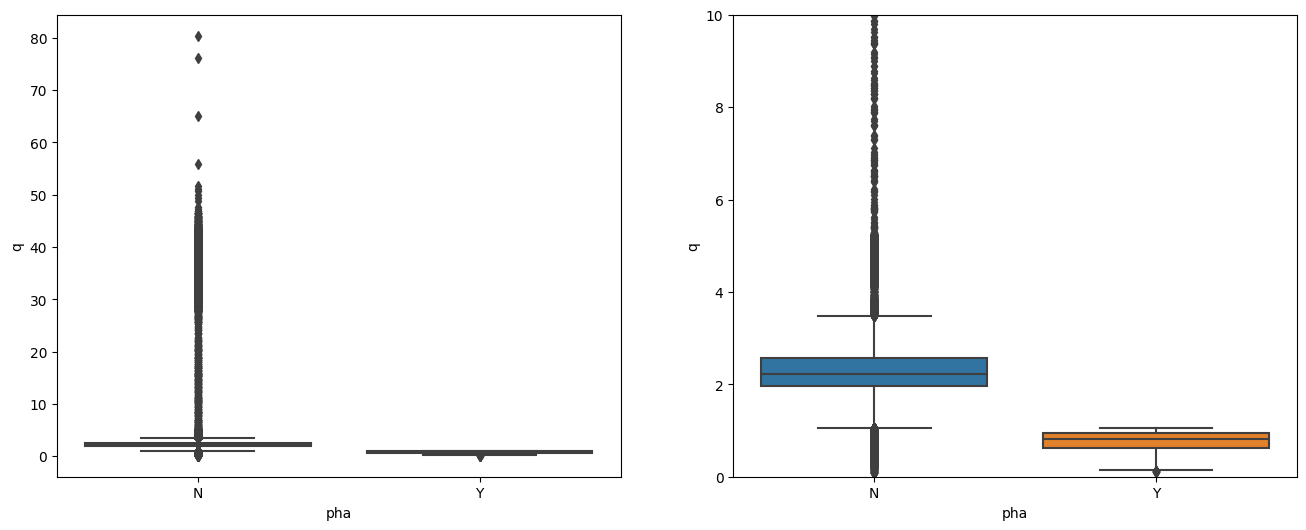

In [20]:
#q – Perihelion distance. The minimum distance at the perihelion point.
fig, axes = plt.subplots(figsize=(16, 6),ncols=2)

sns.boxplot(data=dataframe2,x=dataframe2['pha'],y=dataframe2['q'],ax=axes[0])

#From the graphs, we observe that 'q' (Perihelion distance) is a good predictor because the graphs are not in a plane,
#leading us to the conclusion that there is a dependence between 'pha' (potentially hazardous asteroid) and 'q'. 
#This makes sense because 'q' represents the perihelion distance, i.e., the minimum distance at the perihelion point, 
#and we can infer that the closer the body, the greater the danger posed by it.

g=sns.boxplot(data=dataframe2,x=dataframe2['pha'],y=dataframe2['q'],ax=axes[1])
dataframe=dataframe2.copy()

g.set(ylim=(0,10))

[(0.0, 10.0)]

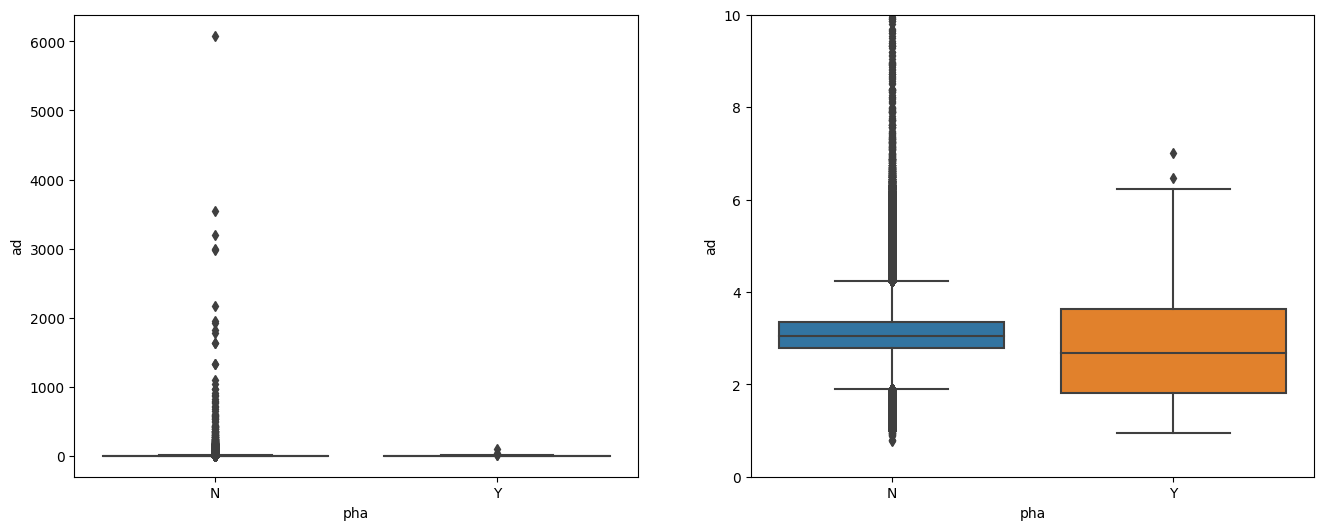

In [21]:
#Aphelion distance (au) - Aphelion is the opposite of perihelion, representing the point in the orbit where the distance between the asteroid and the orbiting body is at its maximum.
fig, axes = plt.subplots(figsize=(16, 6),ncols=2)

sns.boxplot(data=dataframe2,x=dataframe2['pha'],y=dataframe2['ad'],ax=axes[0])

#From the graphs, we observe that 'ad' (Aphelion distance) is not a good predictor because the graphs are in a plane,
#leading us to the conclusion that there is no dependence between 'pha' (potentially hazardous asteroid) and 'ad'.
g=sns.boxplot(data=dataframe2,x=dataframe2['pha'],y=dataframe2['ad'],ax=axes[1])
g.set(ylim=(0,10))




<Axes: xlabel='pha', ylabel='H'>

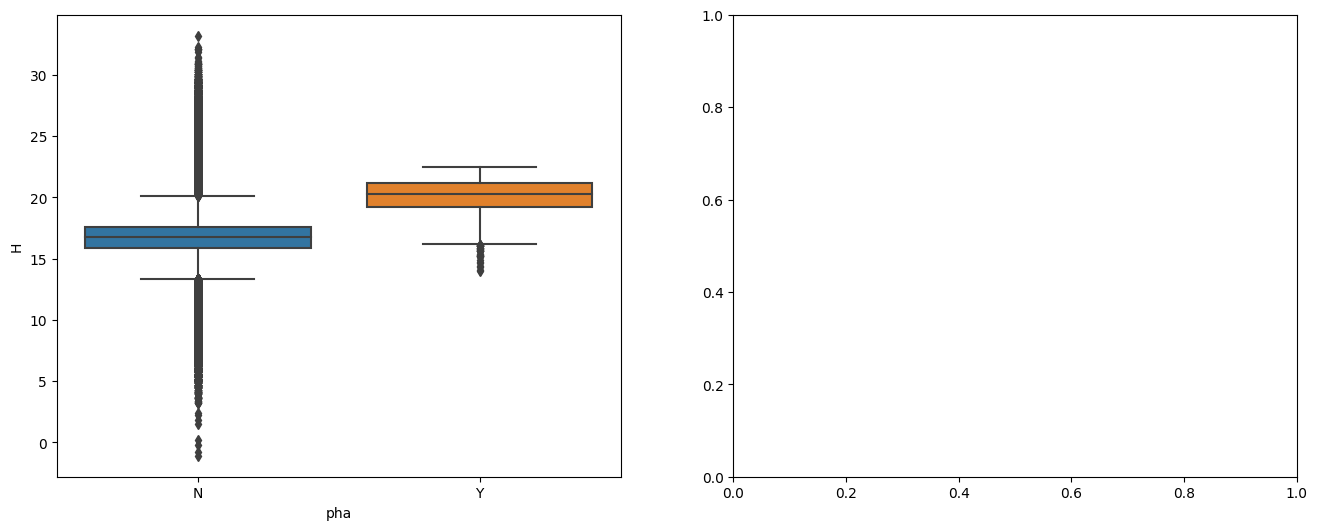

In [22]:
#H-Absolute Magnitude parameter-predstavlja velicinu tela ako bi telo posmatrali sa updaljenosti od 32.6 svetlostnih godina
fig, axes = plt.subplots(figsize=(16, 6),ncols=2)
sns.boxplot(data=dataframe2,x=dataframe2['pha'],y=dataframe2['H'],ax=axes[0])

#From the graphs, we observe that 'H' (Absolute Magnitude parameter) is potentially a good predictor, which is confirmed as accurate during the final testing.

[(0.0, 10000.0)]

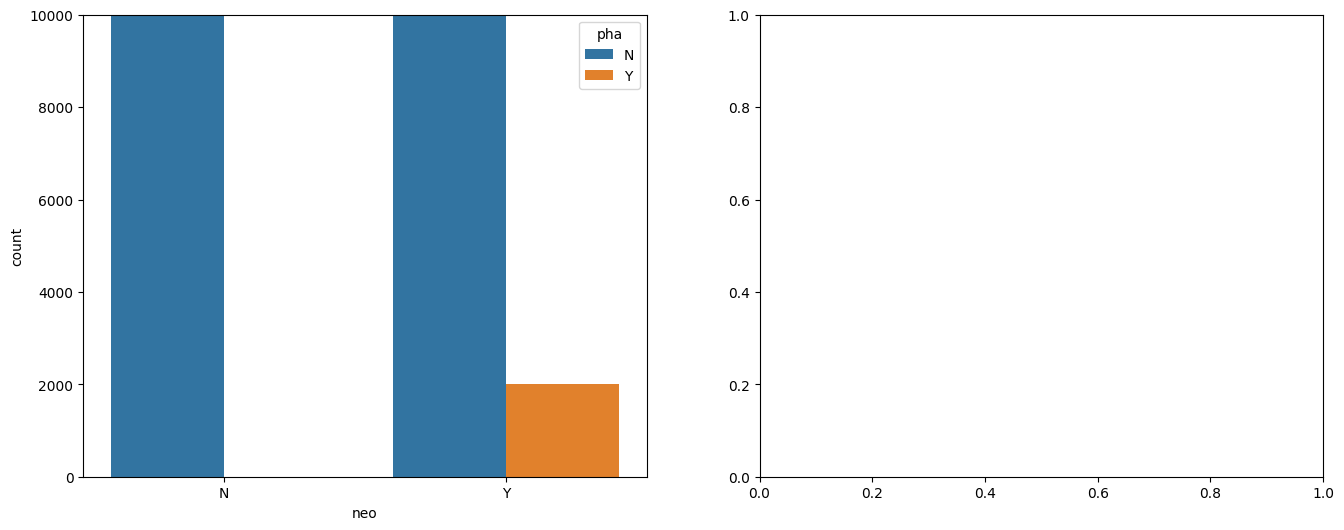

In [23]:
#Near Earth Object (NEO) - indicates whether the object is near Earth or not.
fig, axes = plt.subplots(figsize=(16, 6),ncols=2)

g=sns.countplot(data=dataframe2, x="neo", hue="pha",ax=axes[0])
g.set(ylim=(0,10000))
#From the graphs, we observe that if an asteroid is a Near Earth Object (NEO), there is a good chance that it is hazardous. In other words, there is a correlation between 'pha' (potentially hazardous asteroid) and 'neo' (Near Earth Object).




[(0.0, 5.0)]

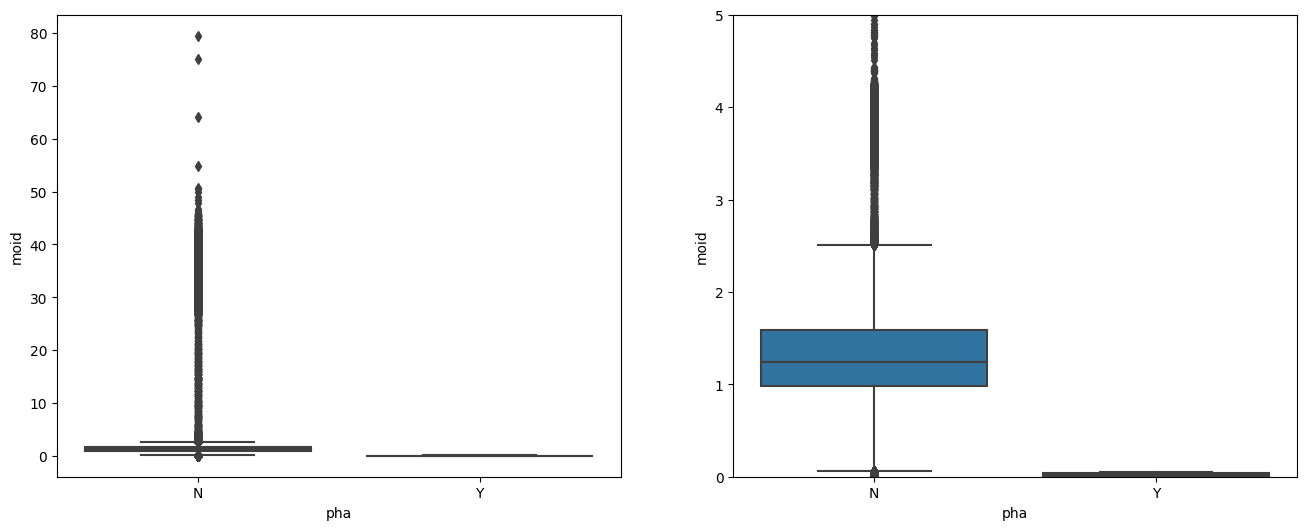

In [24]:
#"Earth Minimum Orbit Intersection Distance" represents the minimum distance between two orbits, in this case, the Earth's orbit and the asteroid's orbit.
fig, axes = plt.subplots(figsize=(16, 6),ncols=2)

sns.boxplot(data=dataframe2,x=dataframe2['pha'],y=dataframe2['moid'],ax=axes[0])


#From the graphs, we notice that there is a correlation between 'pha' (potentially hazardous asteroid) and 'moid' (Earth Minimum Orbit Intersection Distance). In other words, as the distance between orbits decreases, the likelihood of the asteroid being hazardous increases, which also makes logical sense.

g=sns.boxplot(data=dataframe2,x=dataframe2['pha'],y=dataframe2['moid'],ax=axes[1])
g.set(ylim=(0,5))


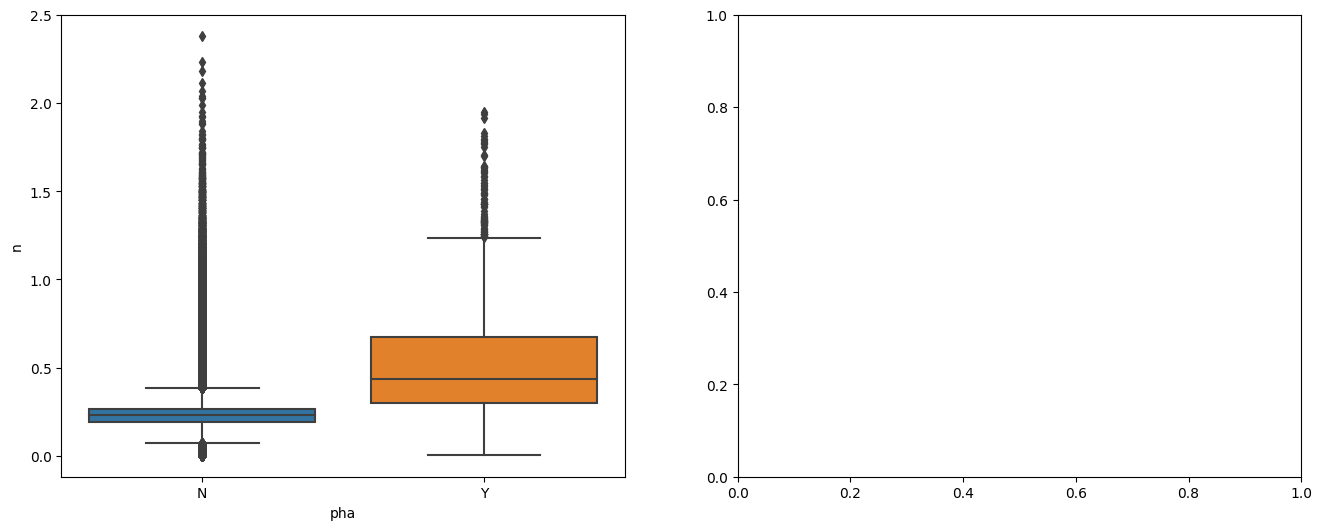

In [25]:
dataframe2=dataframe.copy()
#n-Mean motion represents the speed at which an object orbits or revolves around another body.
fig, axes = plt.subplots(figsize=(16, 6),ncols=2)

sns.boxplot(data=dataframe2,x=dataframe2['pha'],y=dataframe2['n'],ax=axes[0])

#From the graphs, we observe collinearity between 'n' (Mean motion) and 'pha' (potentially hazardous asteroid), 
#indicating that the faster the orbital speed, the higher the chance that the asteroid is hazardous. This makes logical sense.

dataframe=dataframe2.copy()

In [26]:
from sklearn import preprocessing
from sklearn.calibration import LabelEncoder
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import StratifiedKFold, train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import AllKNN

lab = LabelEncoder()

#It resets the indexes so that they are in the range from 1 to the total number of rows.dataframe=dataframe.reset_index(drop=True)

#Label encoding of categorical variables.
dataframe['pha']= lab.fit_transform(dataframe['pha'])
dataframe['neo']= lab.fit_transform(dataframe['neo'])


#We split the dataset into predictors and outputs.
Y=dataframe.iloc[:, [dataframe.columns.get_loc('pha')]]
X=dataframe.drop(["pha"], axis=1)


#Test later to see if scaling affects the results
#https://www.youtube.com/watch?v=bqhQ2LWBheQ
#All algorithms that require gradient calculation must be scaled. Examples include linear/logistic regression and neural networks.
#The scaler performs data normalization by scaling the data to values between 0 and 1.


In [27]:
#Function for graphical representation of recall, precision, F1, etc.

def get_precisions_recalls(actual, preds):
    plt.figure(figsize=(16,10))
    
    plt.subplot(2,2,1)
    precision_0 = np.sum((actual == 0) & (preds == 0)) / np.sum(preds == 0)
    precision_1 = np.sum((actual == 1) & (preds == 1)) / np.sum(preds == 1)
    
    plt.bar([0,1], [precision_0, precision_1])
    plt.xticks([0,1], ['Class 0', 'Class 1'], fontsize=20)
    plt.yticks(np.arange(0,1.1,0.1), fontsize=14)
    plt.ylabel('Precision', fontsize=20)
    plt.title(f'Precision Class 0: {round(precision_0,2)}\nPrecision Class 1: {round(precision_1,2)}', fontsize=20)
    
    plt.subplot(2,2,2)
    recall_0 = np.sum((actual == 0) & (preds == 0)) / np.sum(actual == 0)
    recall_1 = np.sum((actual == 1) & (preds == 1)) / np.sum(actual == 1)
    
    plt.bar([0,1], [recall_0, recall_1])
    plt.xticks([0,1], ['Class 0', 'Class 1'], fontsize=20)
    plt.yticks(np.arange(0,1.1,0.1), fontsize=14)
    plt.ylabel('Recall', fontsize=20)
    plt.title(f'Recall Class 0: {round(recall_0,2)}\nRecall Class 1: {round(recall_1,2)}', fontsize=20)
    

    plt.subplot(2,1,2)
    F1_0 = 2*((precision_0*recall_0)/(precision_0+recall_0))
    F1_1 = 2*((precision_1*recall_1)/(precision_1+recall_1))

    plt.bar([0,1], [F1_0, F1_1])
    plt.xticks([0,1], ['Class 0', 'Class 1'], fontsize=20)
    plt.yticks(np.arange(0,1.1,0.1), fontsize=14)
    plt.ylabel('F1', fontsize=20)
    plt.title(f'F1 Class 0: {round(F1_0,2)}\nF1 Class 1: {round(F1_1,2)}', fontsize=20)

    plt.tight_layout()
    plt.show()

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE


#Splitting the dataframe into training and test sets using stratification.
RezultatiTestiranja=pandas.DataFrame(columns=["ImeModela",'Max Accuracy',"Min Accuracy","Avg Accuracy","Max precision","Min precision","Avg precision","Max recal","Min recal","Avg recal"
                                              ,"Max f1","Min f1","Avg f1"])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    stratify=Y, 
                                                    test_size=0.1,random_state=1)


#We need to consider that the number of non-dangerous asteroids is much larger
#than the number of dangerous asteroids.
#Therefore, some form of resampling technique needs to be applied.
#https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

#We have chosen a combination of undersampling and oversampling (SMOTE).

print("Broj trening podataka:",len(X_train))
print("Broj test podataka:",len(X_test))
print("\n")
print("Broj pozitivnih trening podataka:",len(Y_train.loc[(Y_train["pha"]==1)]))
print("Broj negativnih trening podataka:",len(Y_train.loc[(Y_train["pha"]==0)]))
print("Broj pozitivnih test podataka:",len(Y_test.loc[(Y_test["pha"]==1)]))
print("Broj negativnih test podataka:",len(Y_test.loc[(Y_test["pha"]==0)]))
print("\n")



rus = RandomUnderSampler(sampling_strategy=0.3,random_state=1)
sm = SMOTE(random_state=1,sampling_strategy=0.05)
X_train, Y_train = sm.fit_resample(X_train, Y_train)
X_train, Y_train = rus.fit_resample(X_train, Y_train)

X_train=X_train.reset_index(drop=True)
Y_train=Y_train.reset_index(drop=True)

print("Broj pozitivnih trening podataka:",len(Y_train.loc[(Y_train["pha"]==1)]))
print("Broj negativnih trening podataka:",len(Y_train.loc[(Y_train["pha"]==0)]))
print("\n")



#For model evaluation, we use StratifiedKFold cross-validation, which is perfect for our problem.
#This cross-validation object is a variation of KFold that returns stratified folds (always includes instances of the minority class).
#Folds are created by preserving the percentage of samples for each class, thus solving the problem of imbalanced classification.


skf = StratifiedShuffleSplit(n_splits=15, random_state=1,test_size=0.07)
#We split the dataset into 15 equal parts, taking into account the data imbalance.


#https://www.analyticsvidhya.com/blog/2021/07/metrics-to-evaluate-your-classification-model-to-take-the-right-decisions/
#https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5
#https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/



Broj trening podataka: 738760
Broj test podataka: 82085


Broj pozitivnih trening podataka: 1813
Broj negativnih trening podataka: 736947
Broj pozitivnih test podataka: 202
Broj negativnih test podataka: 81883


Broj pozitivnih trening podataka: 36847
Broj negativnih trening podataka: 122823




c:\Users\kebab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Text(0.5, 0, 'Random Forest Feature Importance')

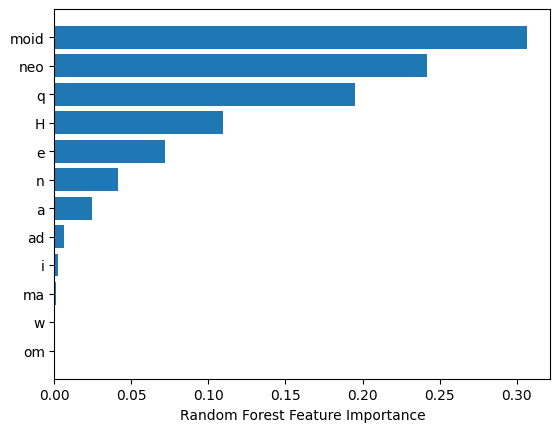

In [29]:
#Now we are performing feature selection to reduce the complexity of the model.

from PIL import Image
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(n_estimators=100,
                                random_state=1)
forest.fit(X_train,Y_train)


sorted_idx = forest.feature_importances_.argsort()


plt.barh(X.columns[sorted_idx], forest.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [30]:
#From the graphics, we conclude that ma, w, i, ad, and om do not influence the model and can be deleted.

X_train=X_train.drop(["ma","w","ad","om","i"], axis=1)
X_test=X_test.drop(["ma","w","ad","om","i"], axis=1)

[(0.0, 3.0)]

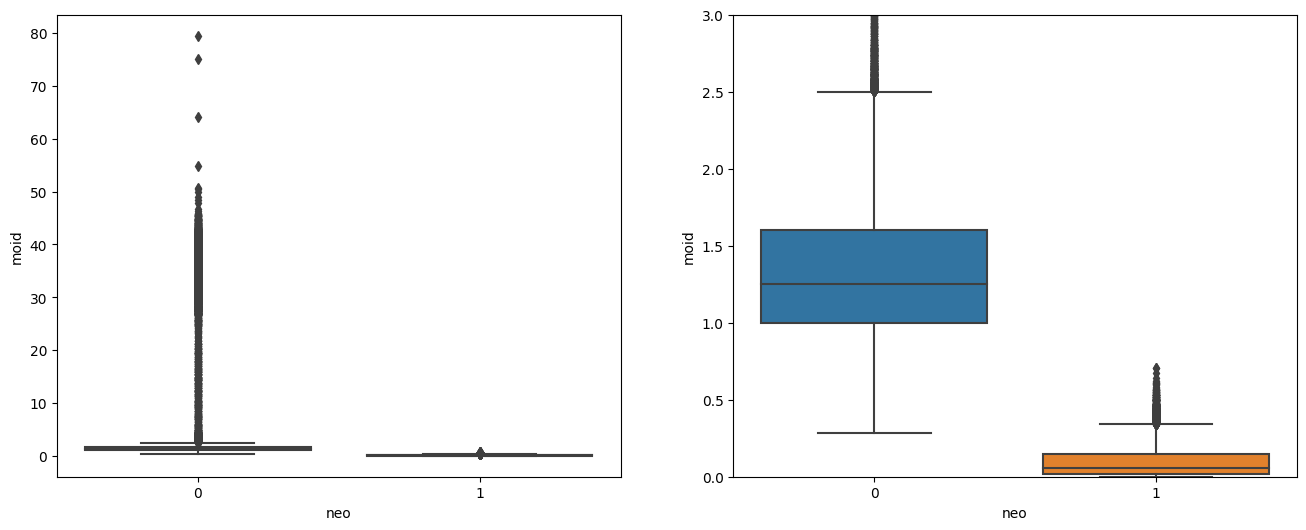

In [31]:
#We are checking the correlation between moid (Earth Minimum Orbit Intersection Distance) and neo (Near Earth Object).

dataframe2=dataframe.copy()
fig, axes = plt.subplots(figsize=(16, 6),ncols=2)


sns.boxplot(data=dataframe2,x=dataframe2['neo'],y=dataframe2['moid'],ax=axes[0])
g=sns.boxplot(data=dataframe2,x=dataframe2['neo'],y=dataframe2['moid'],ax=axes[1])
g.set(ylim=(0,3))

#We establish that there is a correlation between moid (Earth Minimum Orbit Intersection Distance) and neo (Near Earth Object).
#By dropping neo, we obtain poorer results, so both variables will be retained.



In [32]:
from statistics import stdev
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, matthews_corrcoef, precision_score, recall_score, roc_auc_score, roc_curve

#Creating first model
#LogisticRegression


lst_accu_stratified = []
listaPrecisions=[]
listaRecall=[]
listaf1=[]

scaler = StandardScaler()


for train_index, test_index in skf.split(X_train, Y_train): 
    modelLR=LogisticRegression(max_iter=1000,class_weight = 'balanced')#class_weight = 'balanced'
    X_train_fold, X_test_fold = X_train.loc[train_index], X_train.drop(train_index,axis=0)
    y_train_fold, y_test_fold = Y_train.loc[train_index], Y_train.drop(train_index,axis=0)
    

    X_train_fold = scaler.fit_transform(X_train_fold)
    X_test_fold = scaler.transform(X_test_fold)  
    modelLR.fit(X_train_fold, y_train_fold.values.ravel()) 
    lst_accu_stratified.append(modelLR.score(X_test_fold, y_test_fold.values.ravel()))

    yPredict=modelLR.predict(X_test_fold)
    listaPrecisions.append(precision_score(y_test_fold, yPredict))
    listaRecall.append(recall_score(y_test_fold, yPredict))
    listaf1.append(f1_score(y_test_fold, yPredict))


    #get_precisions_recalls(y_test_fold.values.ravel(), yPredict)

In [33]:
from numpy import mean


print(lst_accu_stratified)

RezultatiTestiranja.loc[len(RezultatiTestiranja.index)] = ['LogisticRegression', max(lst_accu_stratified)*100, min(lst_accu_stratified)*100,mean(lst_accu_stratified)*100,
                                                         max(listaPrecisions)*100,min(listaPrecisions)*100,mean(listaPrecisions)*100,
                                                         max(listaRecall)*100,min(listaRecall)*100,mean(listaRecall)*100,
                                                         max(listaf1)*100,min(listaf1)*100,mean(listaf1)*100] 
display(RezultatiTestiranja)

[0.9938266082132952, 0.9925740359667173, 0.9919477498434285, 0.9928424443052698, 0.9920372192896126, 0.9939160776594793, 0.9920372192896126, 0.9927529748590856, 0.9934687304285587, 0.9926635054129015, 0.9917688109510602, 0.992305627628165, 0.991589872058692, 0.9932003220900063, 0.9926635054129015]


,ImeModela,Max Accuracy,Min Accuracy,Avg Accuracy,Max precision,Min precision,Avg precision,Max recal,Min recal,Avg recal,Max f1,Min f1,Avg f1
0,LogisticRegression,99.391608,99.158987,99.263965,97.431054,96.483352,96.90957,100.0,100.0,100.0,98.698814,98.210206,98.430323


1
2
Zavrsen thread
Zavrsen thread
Svi tredovi zavrseni


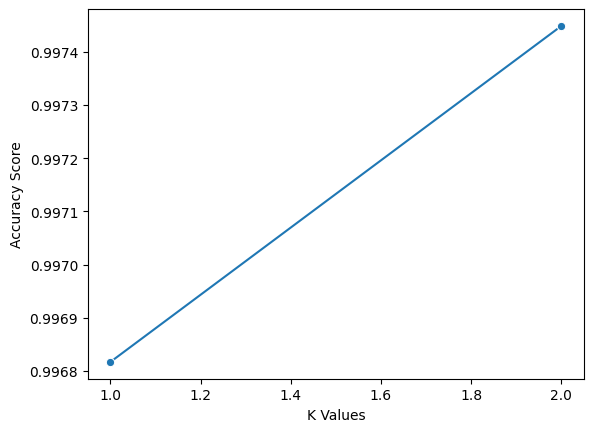

In [34]:
import threading
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

#First, we need to find the appropriate value for k.


k_values = [i for i in range (1,3)]
scores = []

def thread_function(k):
    print(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, Y.values.ravel(), cv=5)
    scores.append(np.mean(score))
    print("Zavrsen thread")


threads = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    x = threading.Thread(target=thread_function, args=(k,))
    threads.append(x)

# Start all threads
for x in threads:
    x.start()

# Wait for all of them to finish
for x in threads:
    x.join()

print("Svi tredovi zavrseni")
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

best_index = np.argmax(scores)
best_k = k_values[best_index]

#After testing, we observed that the optimal value is 4.

best_k=4

In [35]:
#Creating KNeighborsClassifier model
import numpy




scaler = StandardScaler()
lst_accu_stratified = []
listaPrecisions=[]
listaRecall=[]
listaf1=[]

for train_index, test_index in skf.split(X_train, Y_train): 
    knn = KNeighborsClassifier()
    X_train_fold, X_test_fold = X_train.loc[train_index], X_train.drop(train_index,axis=0)
    y_train_fold, y_test_fold = Y_train.loc[train_index], Y_train.drop(train_index,axis=0)
    
    X_train_fold = scaler.fit_transform(X_train_fold)
    X_test_fold = scaler.transform(X_test_fold)
    
    knn.fit(X_train_fold, y_train_fold.values.ravel()) 
    lst_accu_stratified.append(knn.score(X_test_fold, y_test_fold.values.ravel()))
    
    yPredict=knn.predict(X_test_fold)
    listaPrecisions.append(precision_score(y_test_fold, yPredict))
    listaRecall.append(recall_score(y_test_fold, yPredict))
    listaf1.append(f1_score(y_test_fold, yPredict))

In [36]:
from numpy import mean

print(lst_accu_stratified)

RezultatiTestiranja.loc[len(RezultatiTestiranja.index)] = ['KNN', max(lst_accu_stratified)*100, min(lst_accu_stratified)*100,mean(lst_accu_stratified)*100,
                                                         max(listaPrecisions)*100,min(listaPrecisions)*100,mean(listaPrecisions)*100,
                                                         max(listaRecall)*100,min(listaRecall)*100,mean(listaRecall)*100,
                                                         max(listaf1)*100,min(listaf1)*100,mean(listaf1)*100] 
display(RezultatiTestiranja)

[0.9968685693835555, 0.9962422832602666, 0.9957054665831618, 0.995794936029346, 0.9958844054755301, 0.9963317527064508, 0.9959738749217142, 0.9964212221526348, 0.9963317527064508, 0.9958844054755301, 0.9951686499060571, 0.9957054665831618, 0.9959738749217142, 0.996510691598819, 0.9952581193522412]


,ImeModela,Max Accuracy,Min Accuracy,Avg Accuracy,Max precision,Min precision,Avg precision,Max recal,Min recal,Avg recal,Max f1,Min f1,Avg f1
0,LogisticRegression,99.391608,99.158987,99.263965,97.431054,96.483352,96.90957,100.0,100.0,100.0,98.698814,98.210206,98.430323
1,KNN,99.686857,99.516865,99.600370,98.661056,97.949107,98.29790,100.0,100.0,100.0,99.326016,98.963929,99.141556


In [37]:
from sklearn import tree
from sklearn.metrics import accuracy_score



scaler = StandardScaler()
lst_accu_stratified = []
listaPrecisions=[]
listaRecall=[]
listaf1=[]

for train_index, test_index in skf.split(X_train, Y_train): 
    clf = tree.DecisionTreeClassifier()
    X_train_fold, X_test_fold = X_train.loc[train_index], X_train.drop(train_index,axis=0)
    y_train_fold, y_test_fold = Y_train.loc[train_index], Y_train.drop(train_index,axis=0)

    X_train_fold = scaler.fit_transform(X_train_fold)
    X_test_fold = scaler.transform(X_test_fold)
    
    clf.fit(X_train_fold, y_train_fold.values.ravel()) 
    lst_accu_stratified.append(clf.score(X_test_fold, y_test_fold.values.ravel()))

    yPredict=clf.predict(X_test_fold)
    listaPrecisions.append(precision_score(y_test_fold, yPredict))
    listaRecall.append(recall_score(y_test_fold, yPredict))
    listaf1.append(f1_score(y_test_fold, yPredict))


In [38]:
from numpy import mean

print(lst_accu_stratified)

RezultatiTestiranja.loc[len(RezultatiTestiranja.index)] = ['DecisionTreeClassifier', max(lst_accu_stratified)*100, min(lst_accu_stratified)*100,mean(lst_accu_stratified)*100,
                                                         max(listaPrecisions)*100,min(listaPrecisions)*100,mean(listaPrecisions)*100,
                                                         max(listaRecall)*100,min(listaRecall)*100,mean(listaRecall)*100,
                                                         max(listaf1)*100,min(listaf1)*100,mean(listaf1)*100] 
display(RezultatiTestiranja)

[0.9998210611076317, 0.9996421222152635, 0.9998210611076317, 0.9998210611076317, 0.9995526527690793, 0.9998210611076317, 0.9996421222152635, 0.9995526527690793, 0.9998210611076317, 0.9998210611076317, 0.9997315916614476, 0.9997315916614476, 0.9999105305538158, 0.9997315916614476, 0.9999105305538158]


,ImeModela,Max Accuracy,Min Accuracy,Avg Accuracy,Max precision,Min precision,Avg precision,Max recal,Min recal,Avg recal,Max f1,Min f1,Avg f1
0,LogisticRegression,99.391608,99.158987,99.263965,97.431054,96.483352,96.909570,100.0,100.000000,100.000000,98.698814,98.210206,98.430323
1,KNN,99.686857,99.516865,99.600370,98.661056,97.949107,98.297900,100.0,100.000000,100.000000,99.326016,98.963929,99.141556
2,DecisionTreeClassifier,99.991053,99.955265,99.975545,100.000000,99.845081,99.953497,100.0,99.844901,99.940545,99.980616,99.903082,99.947007


In [ ]:
from xgboost import XGBClassifier

scaler = StandardScaler()
lst_accu_stratified = []
listaPrecisions=[]
listaRecall=[]
listaf1=[]

for train_index, test_index in skf.split(X_train, Y_train): 
    XGBC = XGBClassifier()
    X_train_fold, X_test_fold = X_train.loc[train_index], X_train.drop(train_index,axis=0)
    y_train_fold, y_test_fold = Y_train.loc[train_index], Y_train.drop(train_index,axis=0)

    X_train_fold = scaler.fit_transform(X_train_fold)
    X_test_fold = scaler.transform(X_test_fold)
    
    XGBC.fit(X_train_fold, y_train_fold.values.ravel()) 
    lst_accu_stratified.append(XGBC.score(X_test_fold, y_test_fold.values.ravel()))

    yPredict=XGBC.predict(X_test_fold)
    listaPrecisions.append(precision_score(y_test_fold, yPredict))
    listaRecall.append(recall_score(y_test_fold, yPredict))
    listaf1.append(f1_score(y_test_fold, yPredict))

In [ ]:
from numpy import mean

print(lst_accu_stratified)

RezultatiTestiranja.loc[len(RezultatiTestiranja.index)] = ['XGBClassifier', max(lst_accu_stratified)*100, min(lst_accu_stratified)*100,mean(lst_accu_stratified)*100,
                                                         max(listaPrecisions)*100,min(listaPrecisions)*100,mean(listaPrecisions)*100,
                                                         max(listaRecall)*100,min(listaRecall)*100,mean(listaRecall)*100,
                                                         max(listaf1)*100,min(listaf1)*100,mean(listaf1)*100] 
display(RezultatiTestiranja)